In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", np.nan, inplace=True)

# Task 1
Print the count of men and women in the dataset.

In [3]:
df.sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [4]:
df[df["sex"] == "Male"]["age"].mean()

39.43354749885268

# Task 3
Get the percentage of people from Poland (native-country)

In [5]:
(df["native-country"] == "Poland").sum() / len(df) * 100

0.18426952489174164

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [6]:
print(df[df["salary"] == ">50K"]["age"].mean())
print(df[df["salary"] == ">50K"]["age"].std())

print(df[df["salary"] == "<=50K"]["age"].mean())
print(df[df["salary"] == "<=50K"]["age"].std())

44.24984058155847
10.519027719851826
36.78373786407767
14.02008849082488


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [7]:
df[(df["education"].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])) & (df["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303
11,11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,>50K,279
14,14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,NaN,>50K,325
19,19,43,Self-emp-not-inc,Masters,Divorced,Exec-managerial,Unmarried,White,Female,45,United-States,>50K,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,32536,34,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,55,United-States,>50K,260
32538,32538,38,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K,248
32539,32539,71,NaN,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,10,United-States,>50K,62
32545,32545,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K,122


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [8]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [9]:
print(df[(df["sex"]=="Male") & (df["marital-status"].str.startswith("Married"))].describe())
print(df[(df["sex"]=="Male") & (~df["marital-status"].str.startswith("Married"))].describe())

         Unnamed: 0           age  hours-per-week     salary K$
count  13541.000000  13541.000000    13541.000000  13541.000000
mean   16356.250055     43.666568       44.077838    106.356178
std     9419.441051     12.069749       11.676555    102.152510
min        1.000000     17.000000        1.000000     15.000000
25%     8227.000000     34.000000       40.000000     30.000000
50%    16367.000000     42.000000       40.000000     46.000000
75%    24533.000000     52.000000       50.000000    181.000000
max    32557.000000     90.000000       99.000000    349.000000
         Unnamed: 0          age  hours-per-week    salary K$
count   8249.000000  8249.000000     8249.000000  8249.000000
mean   16111.686871    32.484907       39.719966    45.977088
std     9400.562295    12.466660       12.345707    53.237762
min        0.000000    17.000000        1.000000    15.000000
25%     7987.000000    23.000000       38.000000    24.000000
50%    16108.000000    29.000000       40.000000    

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [10]:
df[df["hours-per-week"] == df["hours-per-week"].max()].shape[0]

85

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

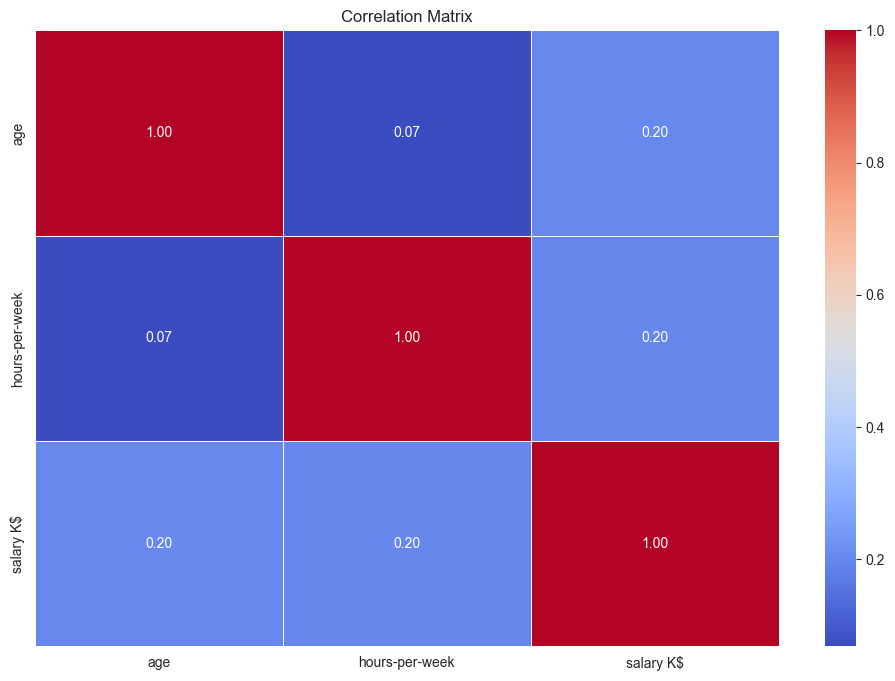

In [11]:
numeric_df = df[
    ["age", "hours-per-week", "salary K$"]
]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()